# MIT 801 - SL Exam

## Question 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
import statsmodels.api as sm
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize , poly)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [5]:
sqData = pd.read_excel('sqData.xlsx')

In [6]:
x = sqData['x']
y = sqData['y']

In [7]:
sqData.head()

,x,y
0,52.4491,285480.69
1,33.6676,-156453.07
2,20.9333,58117.67
3,79.0828,930768.05
4,66.6792,799101.01


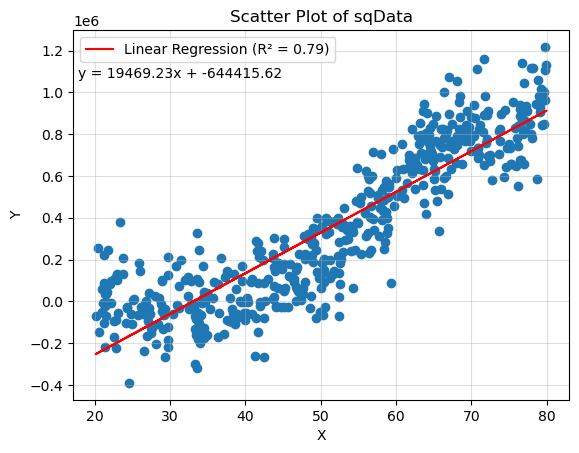

In [8]:
#Scatter Plot
plt.scatter(x , y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of sqData')

#Linear Regression
slope, intercept, r_value, _, _ = linregress(x, y)
plt.plot(x, slope*x + intercept, 'r', label=f'Linear Regression (R² = {r_value**2:.2f})')
#Text for the parameters (using plt.text or plt.annotate)
plt.text(0.01, 0.9, f'y = {slope:.2f}x + {intercept:.2f}', transform=plt.gca().transAxes, verticalalignment='top')

plt.legend()
plt.grid(alpha=0.4)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#Create polynomial features
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(sqData[['x']])

#Fit the model
model = LinearRegression()
model.fit(X_poly, sqData['y'])

#Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

#Create the equation
equation_str = f"y = {intercept:.2f} + {coefficients[1]:.2f}x + {coefficients[2]:.2f}x^2 + {coefficients[3]:.2f}x^3"

In [10]:
equation_str

'y = 1514186.96 + -116757.25x + 2595.38x^2 + -15.37x^3'

C:\Users\ThokozileKhosa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


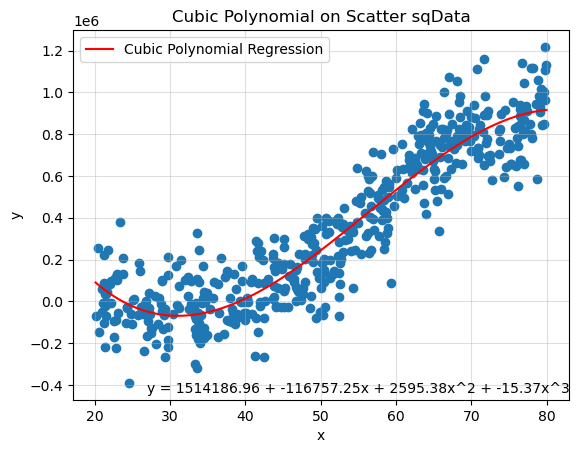

Estimated Model:
y = 1514186.96 + -116757.25x + 2595.38x^2 + -15.37x^3


In [11]:
#Plot data and fitted curve
x_range = np.linspace(sqData['x'].min(), sqData['x'].max(), 100)
y_pred = model.predict(poly_features.transform(x_range.reshape(-1, 1)))
plt.scatter(sqData['x'], sqData['y'])
plt.plot(x_range, y_pred, 'r', label='Cubic Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Polynomial on Scatter sqData')

#Display equation on the plot
plt.text(0.15, 0.01, equation_str, transform=plt.gca().transAxes, verticalalignment='bottom')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

# Print the equation
print("Estimated Model:")
print(equation_str)

In [12]:
#Prediction for x = 70.5
x_value = 70.5
#make new array with all the new exponents 
y_pred = model.predict(poly_features.transform([[x_value]])) 

#Display prediction formula and result
print("Prediction Formula:")
print(f"y = {model.intercept_:.2f} + {model.coef_[1]:.2f}x + {model.coef_[2]:.2f}x^2 + {model.coef_[3]:.2f}x^3")

print(f"\nPrediction for x = {x_value}: y = {y_pred[0]:.2f}")


Prediction Formula:
y = 1514186.96 + -116757.25x + 2595.38x^2 + -15.37x^3

Prediction for x = 70.5: y = 797759.15


C:\Users\ThokozileKhosa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


## Spline

In [13]:
from scipy.interpolate import LSQUnivariateSpline

#Sort data
sqData = sqData.sort_values(by='x')

knots = [30, 50, 68]

# Fit the cubic spline polynomial regression model
spline = LSQUnivariateSpline(sqData['x'], sqData['y'], knots, k=3)

#Extract the coefficients
coeffs = spline.get_coeffs()

#Define basis functions
def basis_functions(x, knots):
    h = [
        lambda x: 1,
        lambda x: x,
        lambda x: x**2,
        lambda x: x**3,
    ]
    for knot in knots:
        h.append(lambda x, knot=knot: ((x - knot)**3) * (x > knot))
    return h

#Generate basis function
basis_names = ['1', 'x', 'x^2', 'x^3'] + [f'(x - {k})^3_+' for k in knots]

#Print model equation
model_eq = "y = " + " + ".join([f"{coeff:.2f}*{name}" for coeff, name in zip(coeffs, basis_names)])
print("Model equation:")
print(model_eq)


Model equation:
y = 63784.37*1 + -69055.90*x + 10109.90*x^2 + -21020.41*x^3 + 957903.04*(x - 30)^3_+ + 710693.06*(x - 50)^3_+ + 1012589.58*(x - 68)^3_+


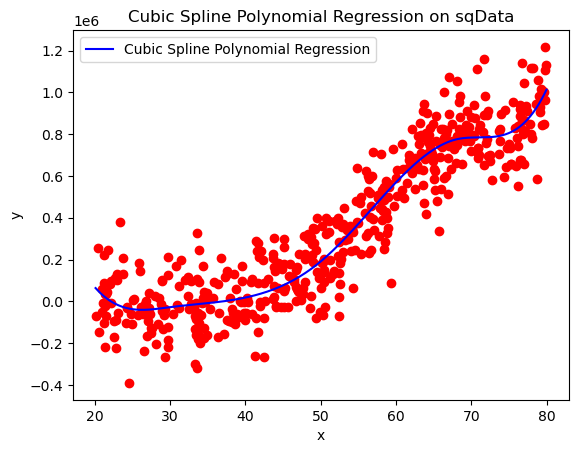

In [14]:
x_range = np.linspace(min(sqData['x']), max(sqData['x']), 500)
y_spline = spline(x_range)

#Plot data and spline
plt.scatter(sqData['x'], sqData['y'], color='red')
plt.plot(x_range, y_spline, label='Cubic Spline Polynomial Regression', color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Cubic Spline Polynomial Regression on sqData')
plt.show()

In [15]:
#Prediction for x = 70.5
x_value = 70.5
y_pred = spline(x_value) 

print("Prediction Formula:")
print(model_eq)
print(f"\nPrediction for x = {x_value}: y = {y_pred:.2f}") 

Prediction Formula:
y = 63784.37*1 + -69055.90*x + 10109.90*x^2 + -21020.41*x^3 + 957903.04*(x - 30)^3_+ + 710693.06*(x - 50)^3_+ + 1012589.58*(x - 68)^3_+

Prediction for x = 70.5: y = 784043.58


In [16]:
#Basis function values for the prediction point
basis_values = [h(x_value) for h in basis_functions(x_value, knots)]
print("\nPrediction Breakdown for x =", x_value)
print("-----------------------------------")
for i, name in enumerate(basis_names):
    print(f"{name}: {basis_values[i]:.2f}")
print(f"Predicted y: {y_pred:.2f}")


Prediction Breakdown for x = 70.5
-----------------------------------
1: 1.00
x: 70.50
x^2: 4970.25
x^3: 350402.62
(x - 30)^3_+: 66430.12
(x - 50)^3_+: 8615.12
(x - 68)^3_+: 15.62
Predicted y: 784043.58


### Evaluation

In [17]:
from sklearn.metrics import r2_score
# ----- Cubic Polynomial Model -----
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(sqData[['x']])
model_poly = LinearRegression()
model_poly.fit(X_poly, sqData['y'])
y_pred_poly = model_poly.predict(X_poly)

# ----- Cubic Spline Model -----
y_pred_spline = spline(sqData['x'])

# ----- R-squared and RSS Calculation -----
r2_poly = r2_score(sqData['y'], y_pred_poly)
r2_spline = r2_score(sqData['y'], y_pred_spline)

rss_poly = np.sum((sqData['y'] - y_pred_poly)**2)
rss_spline = np.sum((sqData['y'] - y_pred_spline)**2)

print("\nCubic Polynomial:")
print(f"  R-squared: {r2_poly:.4f}")
print(f"  Residual Sum of Squares: {rss_poly:.2f}")

print("\nCubic Spline:")
print(f"  R-squared: {r2_spline:.4f}")
print(f"  Residual Sum of Squares: {rss_spline:.2f}")


Cubic Polynomial:
  R-squared: 0.8639
  Residual Sum of Squares: 9301844636005.78

Cubic Spline:
  R-squared: 0.8757
  Residual Sum of Squares: 8491345092836.33


C:\Users\ThokozileKhosa\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


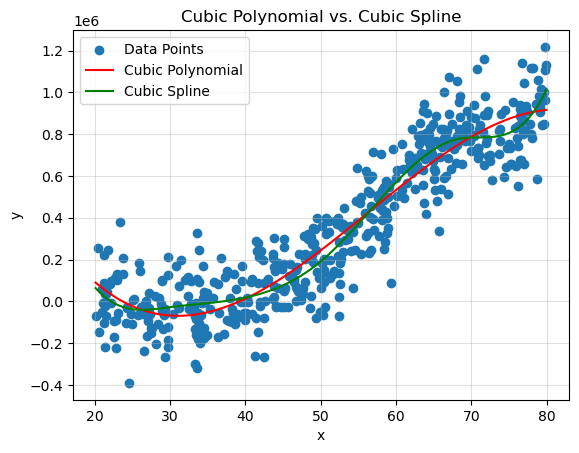

In [18]:
# ----- Plot Both Models for Comparison -----
x_range = np.linspace(sqData['x'].min(), sqData['x'].max(), 100)
y_pred_poly_plot = model_poly.predict(poly_features.transform(x_range.reshape(-1, 1)))
y_pred_spline_plot = spline(x_range)

plt.scatter(sqData['x'], sqData['y'], label='Data Points')
plt.plot(x_range, y_pred_poly_plot, 'r', label='Cubic Polynomial')
plt.plot(x_range, y_pred_spline_plot, 'g', label='Cubic Spline')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Polynomial vs. Cubic Spline')
plt.legend()
plt.grid(alpha=0.4)
plt.show()